Git-Hub:- https://github.com/devsawant92/RNN

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Split the data into train and test datasets

In [2]:
#load data
dataset_train = pd.read_csv('IBM_train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [3]:
training_set

array([[ 206.710007],
       [ 207.179993],
       [ 206.970001],
       ..., 
       [ 159.639999],
       [ 160.089996],
       [ 160.169998]])

In [4]:
#scale the features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
training_set_scaled

array([[ 0.91054481],
       [ 0.91539402],
       [ 0.91322737],
       ..., 
       [ 0.42488648],
       [ 0.42952945],
       [ 0.43035489]])

In [6]:
#create the train data
X_train = []
y_train = []
for i in range(60, 1478):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train

array([[ 0.91054481,  0.91539402,  0.91322737, ...,  0.78033422,
         0.73586459,  0.74762685],
       [ 0.91539402,  0.91322737,  0.92664052, ...,  0.73586459,
         0.74762685,  0.741333  ],
       [ 0.91322737,  0.92664052,  0.90806847, ...,  0.74762685,
         0.741333  ,  0.77414364],
       ..., 
       [ 0.4007429 ,  0.39352048,  0.3728849 , ...,  0.37701196,
         0.4182831 ,  0.4024969 ],
       [ 0.39352048,  0.3728849 ,  0.36267024, ...,  0.4182831 ,
         0.4024969 ,  0.42488648],
       [ 0.3728849 ,  0.36267024,  0.36246383, ...,  0.4024969 ,
         0.42488648,  0.42952945]])

In [8]:
y_train

array([ 0.741333  ,  0.77414364,  0.79075529, ...,  0.42488648,
        0.42952945,  0.43035489])

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [10]:
X_train

array([[[ 0.91054481],
        [ 0.91539402],
        [ 0.91322737],
        ..., 
        [ 0.78033422],
        [ 0.73586459],
        [ 0.74762685]],

       [[ 0.91539402],
        [ 0.91322737],
        [ 0.92664052],
        ..., 
        [ 0.73586459],
        [ 0.74762685],
        [ 0.741333  ]],

       [[ 0.91322737],
        [ 0.92664052],
        [ 0.90806847],
        ..., 
        [ 0.74762685],
        [ 0.741333  ],
        [ 0.77414364]],

       ..., 
       [[ 0.4007429 ],
        [ 0.39352048],
        [ 0.3728849 ],
        ..., 
        [ 0.37701196],
        [ 0.4182831 ],
        [ 0.4024969 ]],

       [[ 0.39352048],
        [ 0.3728849 ],
        [ 0.36267024],
        ..., 
        [ 0.4182831 ],
        [ 0.4024969 ],
        [ 0.42488648]],

       [[ 0.3728849 ],
        [ 0.36267024],
        [ 0.36246383],
        ..., 
        [ 0.4024969 ],
        [ 0.42488648],
        [ 0.42952945]]])

In [11]:
#import Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
#define NN
regressor = Sequential()

In [13]:
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(Dense(units = 1))

In [18]:
#compile NN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#execute NN
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1418/1418 [==============================] - 7s 5ms/step - loss: 0.0459
Epoch 2/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0086
Epoch 3/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0069
Epoch 4/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0067
Epoch 5/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0058
Epoch 6/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0067
Epoch 7/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0059
Epoch 8/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0056
Epoch 9/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0052
Epoch 10/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0055
Epoch 11/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0052
Epoch 12/100
1418/1418 [==============================] - 5s 3ms/step - lo

1418/1418 [==============================] - 5s 3ms/step - loss: 0.0013
Epoch 97/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0012
Epoch 98/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0012
Epoch 99/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0012
Epoch 100/100
1418/1418 [==============================] - 5s 3ms/step - loss: 0.0012


In [20]:
dataset_test = pd.read_csv('IBM_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
real_stock_price

array([[ 158.710007],
       [ 160.059998],
       [ 159.710007],
       [ 157.520004],
       [ 156.570007],
       [ 155.      ],
       [ 152.25    ],
       [ 151.210007],
       [ 153.949997],
       [ 152.070007],
       [ 153.070007],
       [ 153.339996],
       [ 150.800003],
       [ 147.889999],
       [ 154.440002],
       [ 153.460007],
       [ 151.800003],
       [ 155.029999],
       [ 154.369995],
       [ 156.75    ],
       [ 158.669998],
       [ 157.990005],
       [ 158.820007],
       [ 152.139999],
       [ 149.190002],
       [ 147.899994],
       [ 145.029999],
       [ 146.509995],
       [ 145.789993],
       [ 146.600006],
       [ 146.839996]])

In [22]:
#load test-data and create test-set
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [23]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,91):
    X_test.append(inputs[i-60:i,0])

In [24]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

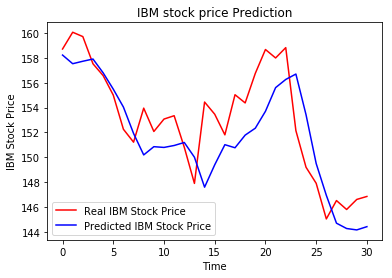

In [25]:
#plot true and predicted values
plt.plot(real_stock_price, color = 'red', label = 'Real IBM Stock Price')
plt.plot(predicted_stock_price,color='blue', label = 'Predicted IBM Stock Price')
plt.title('IBM stock price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()